# Example 1: Analyzing a TESS SC target

In this example, we are going to analyze the prototype $\gamma$-Dor star, $\gamma$-Doradus. This star has been observed in three sectors with TESS observation. The TIC ID for this star is 219234987.

We can access data for this object through three different methods. First, lets acess the data through the TIC ID.

In [1]:
%matplotlib notebook
import os
os.chdir("..")
from smurfs import Smurfs

In [2]:
s = Smurfs(target_name="TIC 219234987")#always use TIC as a prefix

 Searching processed light curves for TIC 219234987 ... 
 Found processed light curve for TIC 219234987! 


 Using TESS observations! Combining sectors ... 
 Total observation length: 78.32 days. 
 Duty cycle for TIC 219234987: 84.45% 


<IPython.core.display.Javascript object>


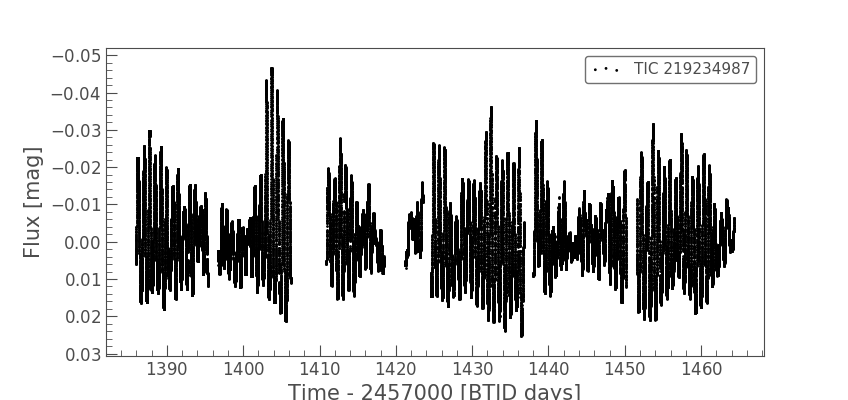

In [3]:
s.plot_lc()

If a TIC ID is provided, it will query MAST for a light curve for this object. You can also directly use any name that is resolvable by Simbad.

In [4]:
s = Smurfs(target_name="Gamma Doradus")

 Searching processed light curves for Gamma Doradus ... 
 Found processed light curve for Gamma Doradus! 


 Using TESS observations! Combining sectors ... 
 Total observation length: 78.32 days. 
 Duty cycle for Gamma Doradus: 84.45% 


<IPython.core.display.Javascript object>


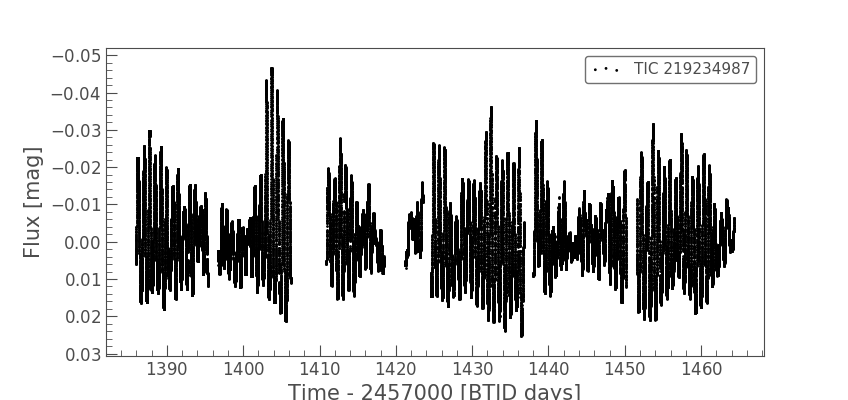

In [5]:
s.plot_lc()

<IPython.core.display.Javascript object>


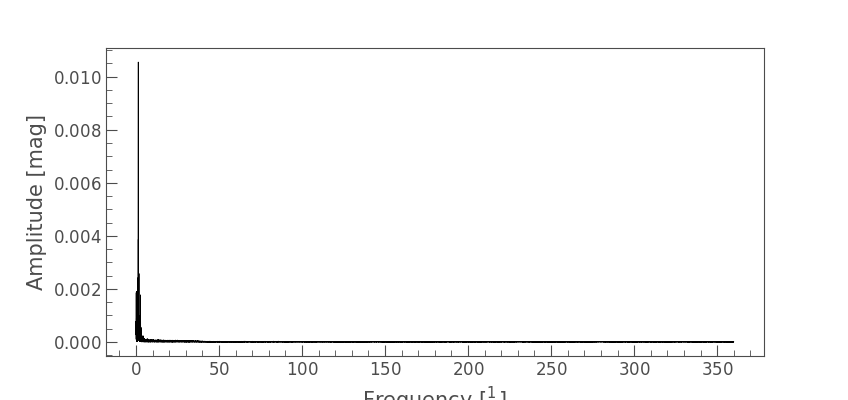

In [6]:
s.plot_pdg()

If a star is loaded, it will automatically perform sigma clipping and combine various sectors and convert the flux to magnitude.

Now that the data has been loaded by Smurfs, we can try to find the frequencies in the signal.

In [7]:
s.run(snr=4,window_size=2) #compute all frequencies up to snr of 4

 Periodogramm from 0.0 1 / d to 360.0 1 / d 
 Starting frequency extraction. 
 Skip similar:  Deactivated  
 Chancel after 10 similar:  Activated  
 Window size: 2 
 Number of extended frequencies: 0 
 Nyquist frequency: 360.0 1 / d 
 List of frequencies, amplitudes, phases, S/N 
 F0   1.36360+/-0.00005 1 / d   0.01055+/-0.00008 mag   0.3940+/-0.0011   14.618957453540753  
 F1   1.32147+/-0.00004 1 / d   0.01010+/-0.00006 mag   0.3417+/-0.0009   17.613022936894808  
 F2   1.47085+/-0.00009 1 / d   0.002811+/-0.000035 mag   0.3841+/-0.0020   7.652337089261566  
 F3   1.87814+/-0.00009 1 / d   0.002402+/-0.000032 mag   0.5305+/-0.0021   6.7199279155337726  
 F4   1.38531+/-0.00010 1 / d   0.002227+/-0.000030 mag   0.1365+/-0.0022   7.35300901062499  
 F5   0.31699+/-0.00010 1 / d   0.002032+/-0.000028 mag   0.0881+/-0.0022   5.647400747049979  
 F6   1.41723+/-0.00010 1 / d   0.001805+/-0.000027 mag   0.5883+/-0.0024   6.540241451770118  
 F7   2.74252+/-0.00010 1 / d   0.001777+/-0.0000

Results are now stores in s.results, as well as in the ff object. Lets have a look at the results.

In [8]:
s.result

,f_obj,frequency,amp,phase,snr,res_noise,significant
0,<smurfs._smurfs.frequency_finder.Frequency obj...,1.36376+/-0.00005,0.01033+/-0.00008,0.4027+/-0.0012,14.618957,-0.000888,True
1,<smurfs._smurfs.frequency_finder.Frequency obj...,1.32096+/-0.00005,0.01025+/-0.00008,0.3599+/-0.0012,17.613023,-0.000841,True
2,<smurfs._smurfs.frequency_finder.Frequency obj...,1.47077+/-0.00019,0.00281+/-0.00008,0.387+/-0.004,7.652337,-0.000854,True
3,<smurfs._smurfs.frequency_finder.Frequency obj...,1.87814+/-0.00022,0.00240+/-0.00008,0.530+/-0.005,6.719928,-0.000853,True
4,<smurfs._smurfs.frequency_finder.Frequency obj...,1.38531+/-0.00024,0.00223+/-0.00008,0.136+/-0.005,7.353009,-0.000863,True
5,<smurfs._smurfs.frequency_finder.Frequency obj...,0.31699+/-0.00026,0.00203+/-0.00008,0.088+/-0.006,5.647401,-0.000865,True
6,<smurfs._smurfs.frequency_finder.Frequency obj...,1.41723+/-0.00030,0.00180+/-0.00008,0.588+/-0.007,6.540241,-0.000859,True
7,<smurfs._smurfs.frequency_finder.Frequency obj...,2.74252+/-0.00030,0.00178+/-0.00008,0.944+/-0.007,9.562180,-0.000859,True
8,<smurfs._smurfs.frequency_finder.Frequency obj...,0.11236+/-0.00033,0.00163+/-0.00008,0.744+/-0.007,5.280380,-0.000856,True
9,<smurfs._smurfs.frequency_finder.Frequency obj...,1.2372+/-0.0004,0.00138+/-0.00008,0.786+/-0.009,5.158449,-0.000856,True


We can also have a look at the individual frequencies.

<IPython.core.display.Javascript object>


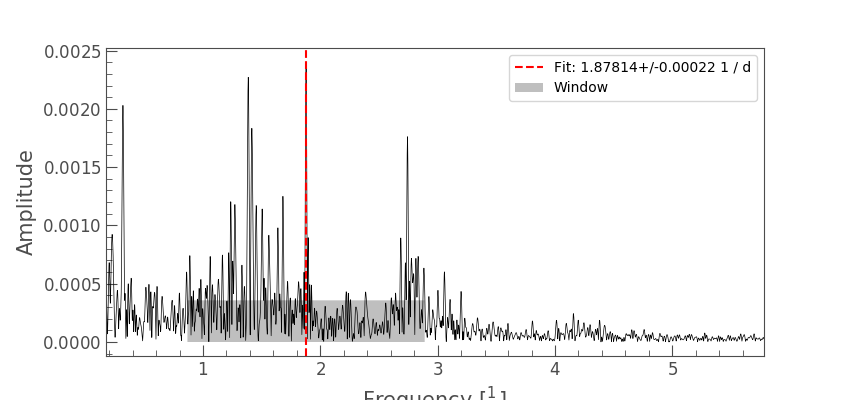

In [9]:
s.result.loc[3].f_obj.plot() #plot shows the found frequency, as well as the window used to compute the SNR.

Lets see where the frequencies are in the periodogram

<IPython.core.display.Javascript object>


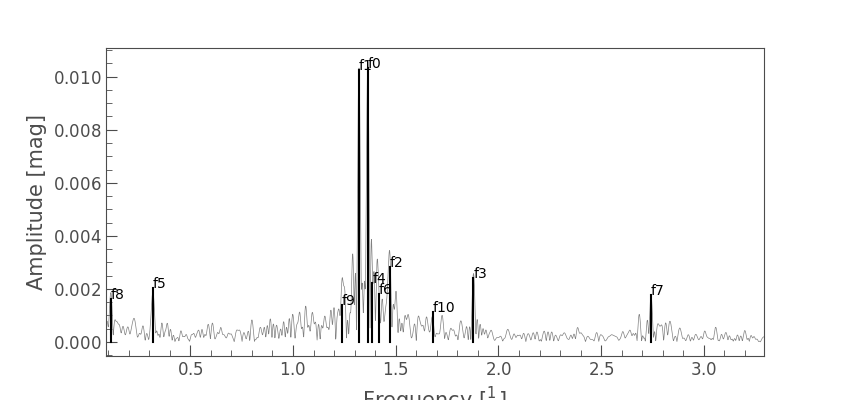

In [10]:
s.plot_pdg()

We can also check how the model compares with the actual light curve

<IPython.core.display.Javascript object>


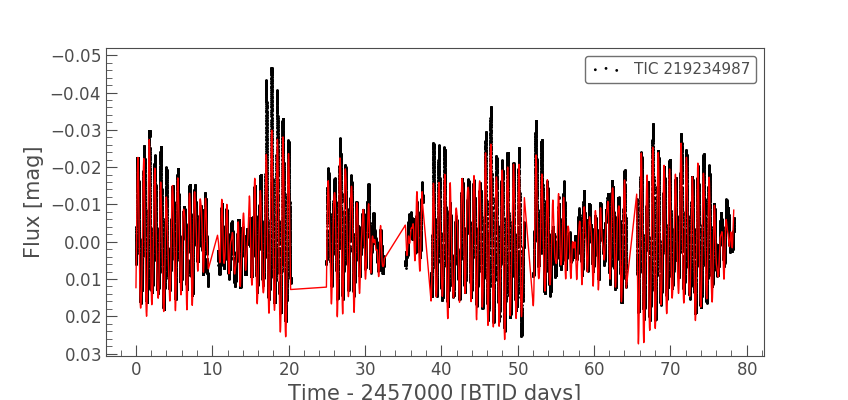

In [11]:
s.plot_lc()

Another thing we can also look at, are the combination frequencies of the result

In [12]:
s.combinations

,Name,ID,Frequency,Amplitude,Solution,Residual,Independent,Other_Solutions
0,f1,1,1.363761,0.010327,None,NaN,True,None
1,f2,2,1.320958,0.010255,None,NaN,True,None
2,f3,3,1.470772,0.002815,None,NaN,True,None
3,f4,4,1.878144,0.002402,None,NaN,True,None
4,f5,5,1.385307,0.002227,f5 = f3 + 2*f2 - 2*f1,0.000141,False,None
5,f6,6,0.316988,0.002032,f6 = 3*f3 - 3*f1,0.004045,False,None
6,f7,7,1.417226,0.001805,None,NaN,True,None
7,f8,8,2.742524,0.001777,f8 = f2 + f7,0.004340,False,None
8,f9,9,0.112357,0.001629,None,NaN,True,None
9,f10,10,1.237200,0.001376,f10 = 3*f2 - 2*f1,0.001848,False,None


We can also save the result!

 Saving results, this may take a bit ... 


<IPython.core.display.Javascript object>


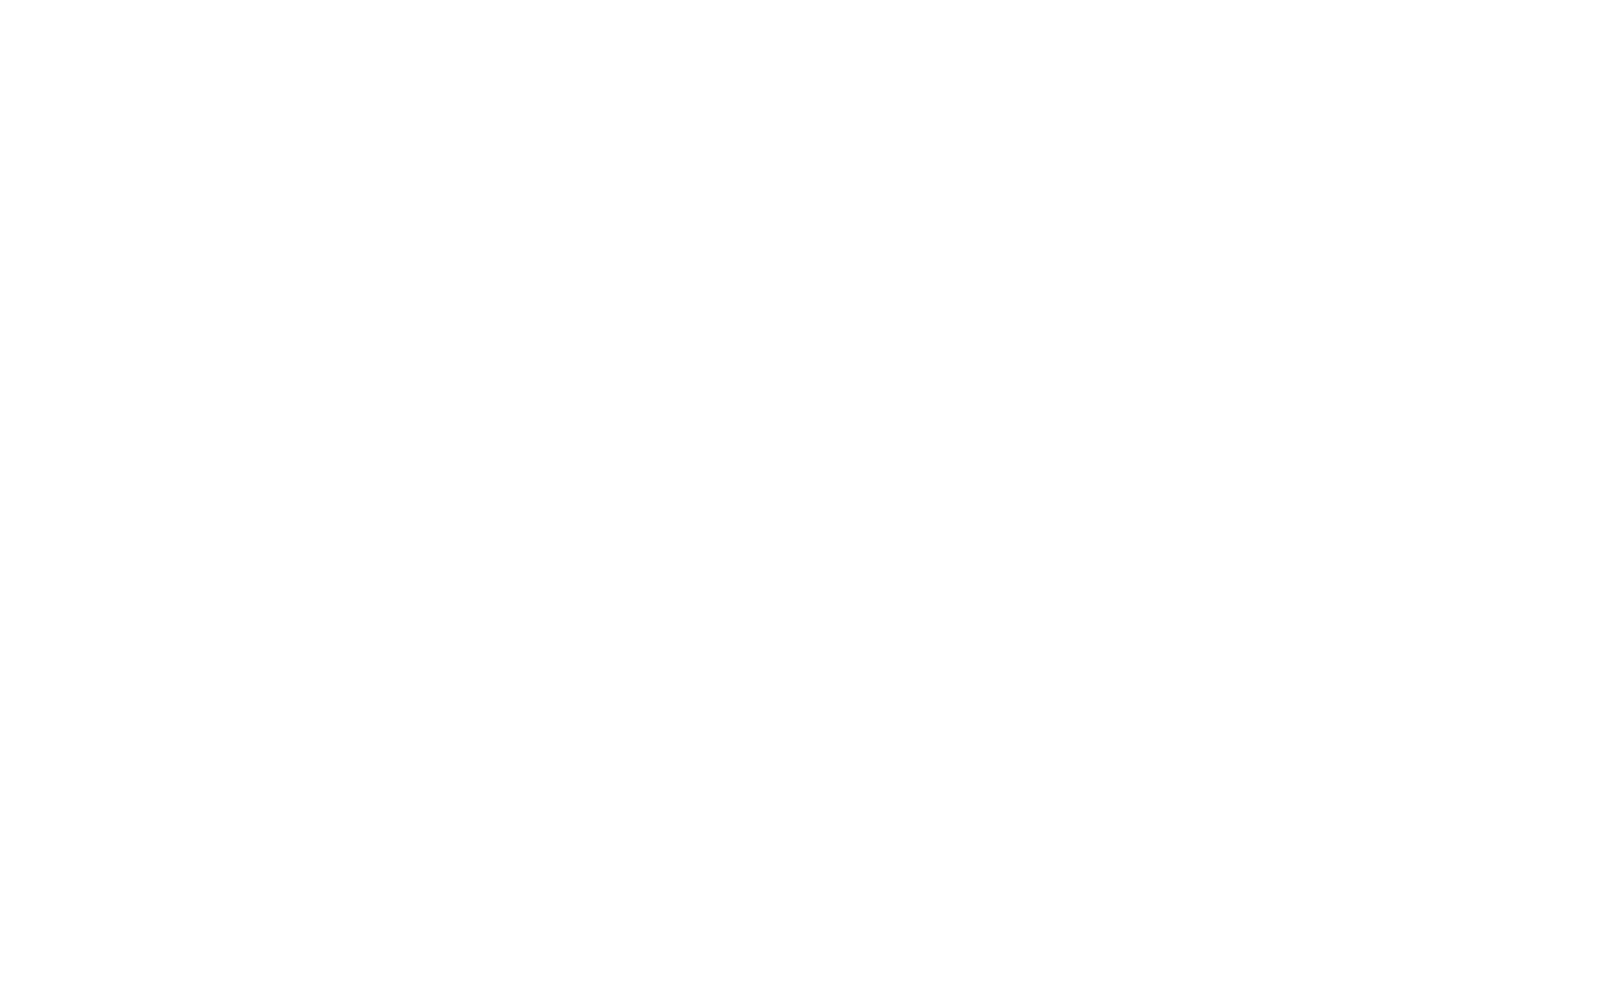

<IPython.core.display.Javascript object>


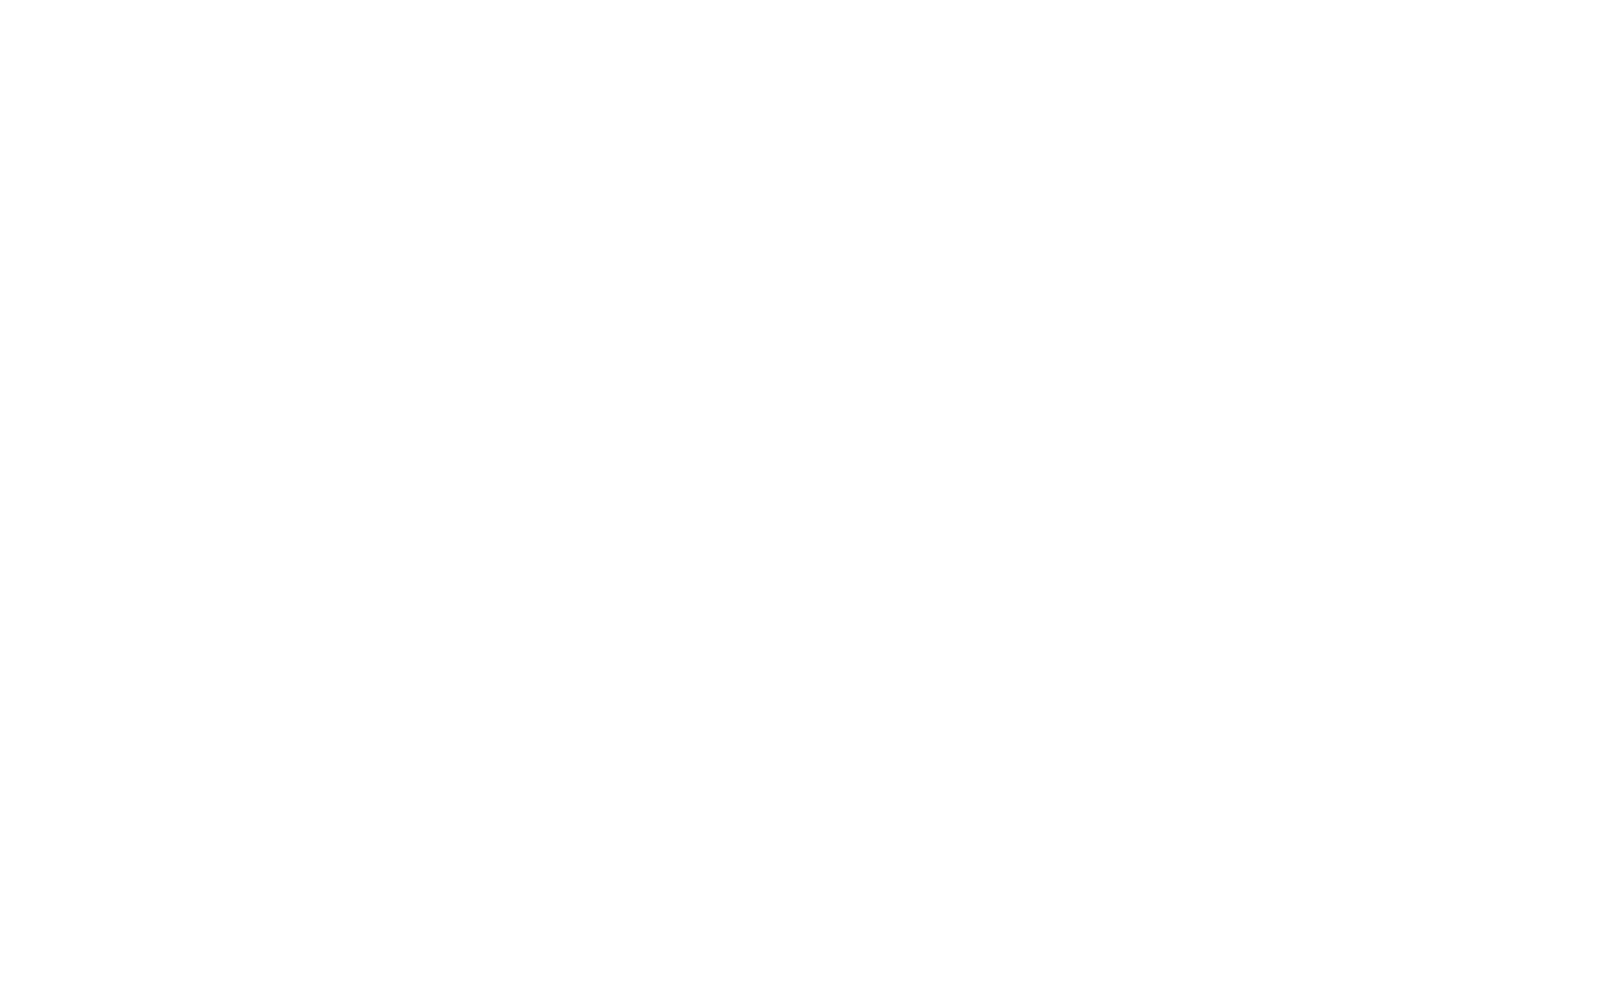

<IPython.core.display.Javascript object>


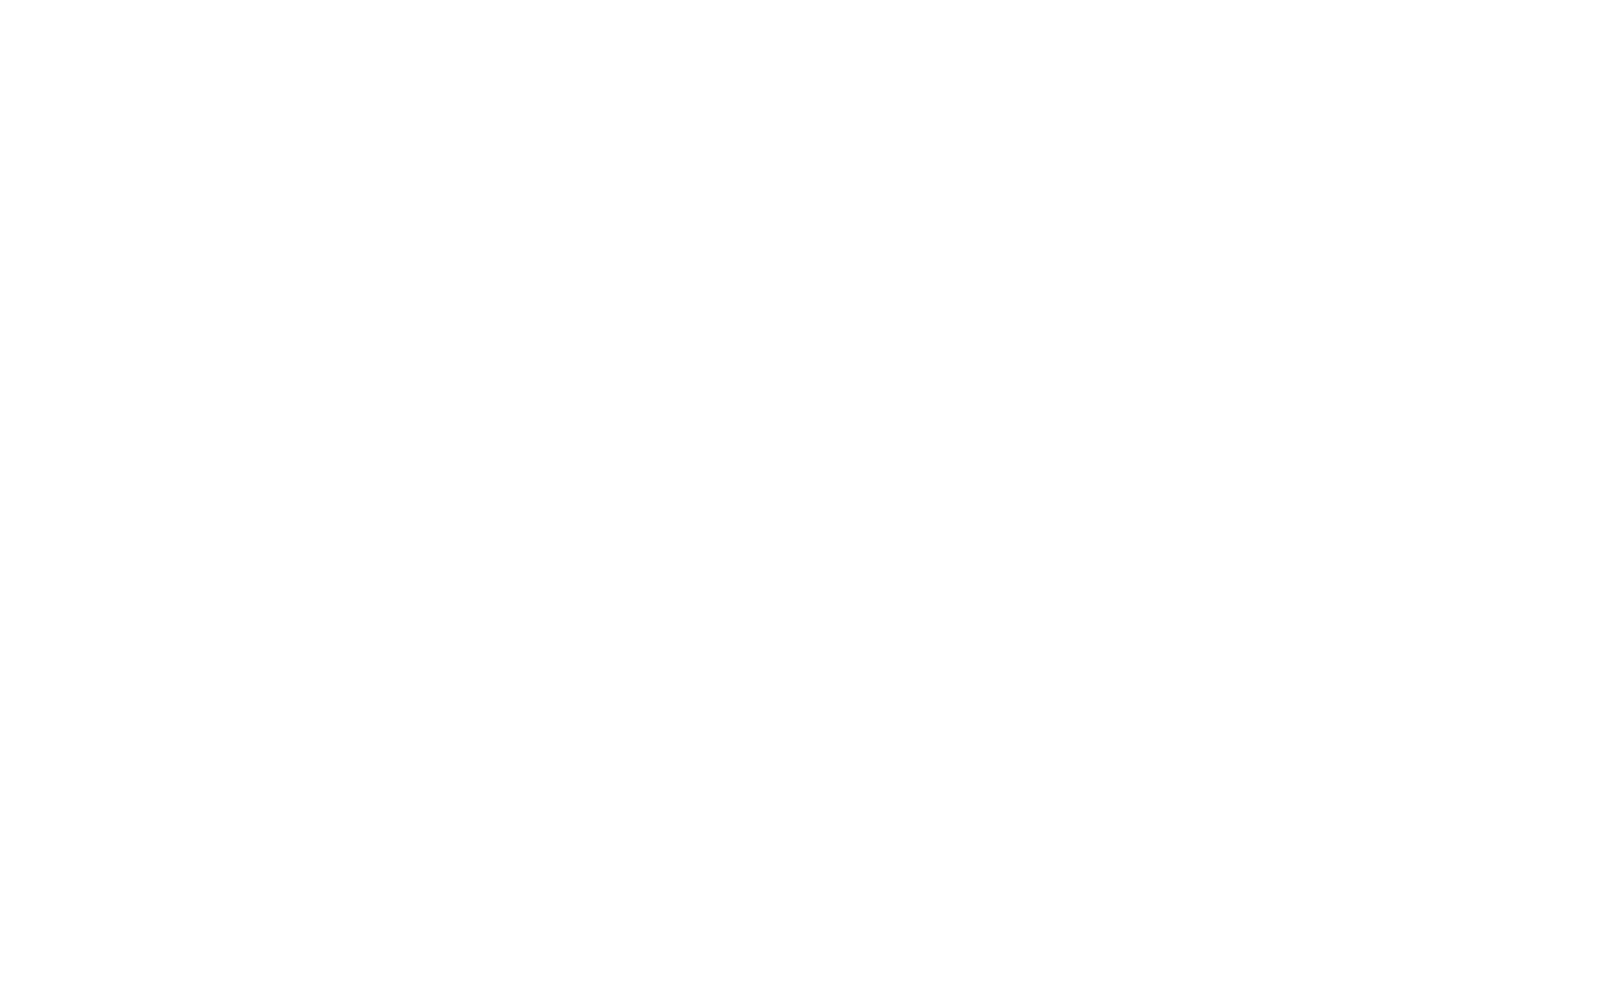

<IPython.core.display.Javascript object>


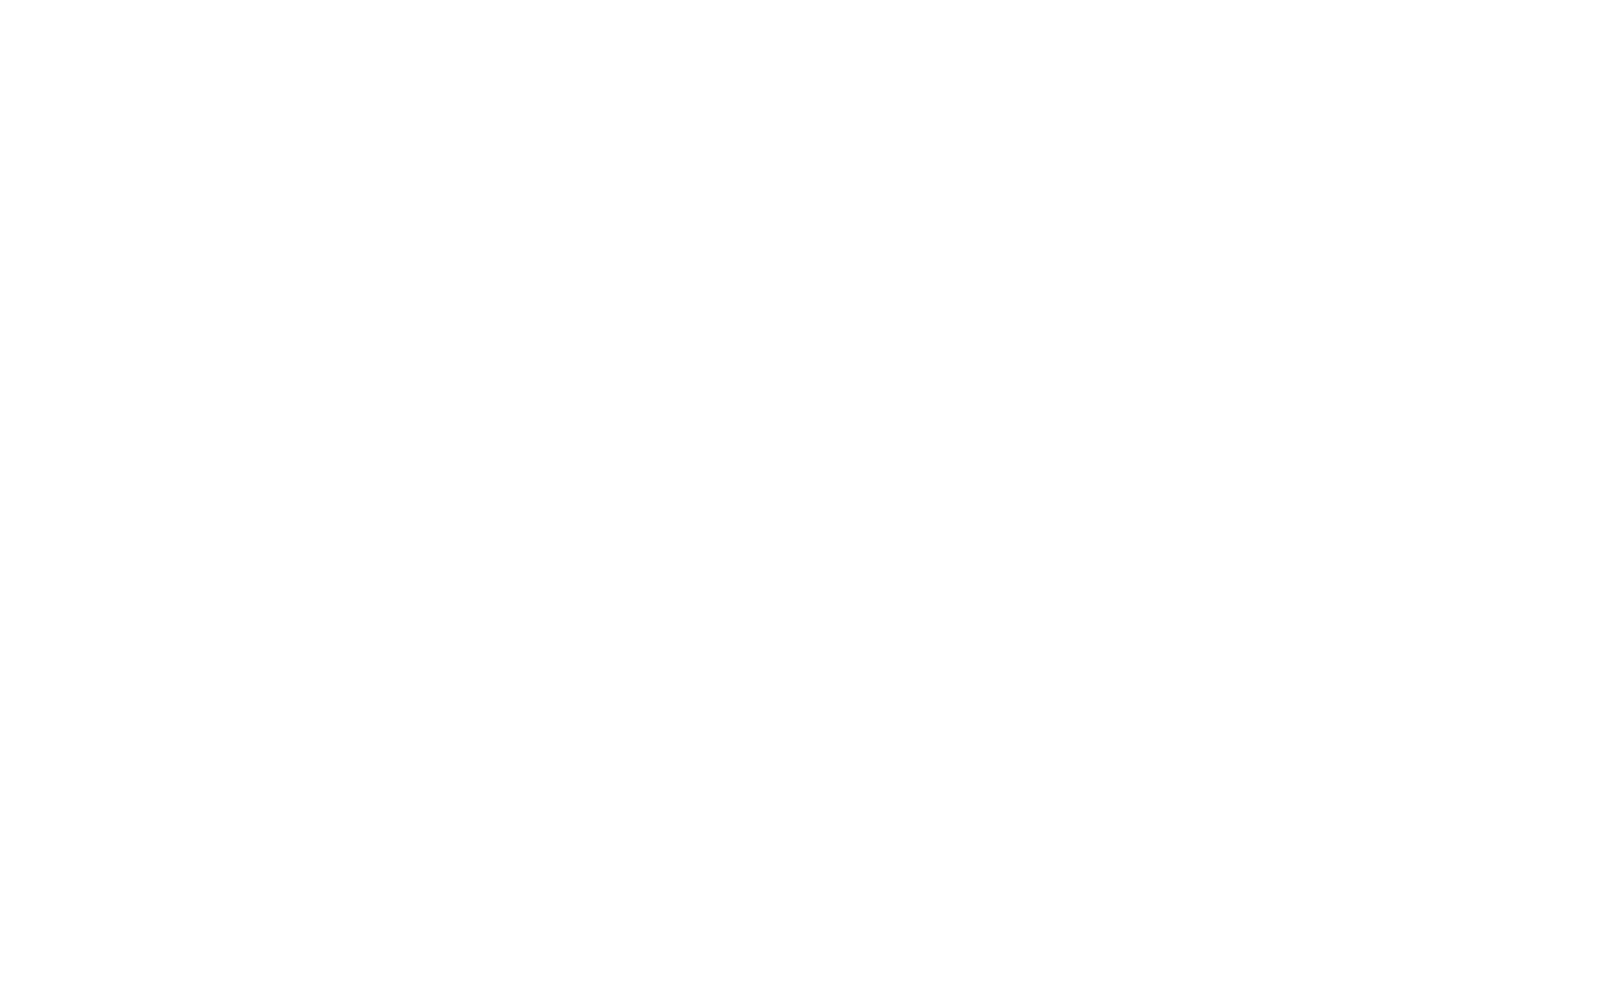

<IPython.core.display.Javascript object>


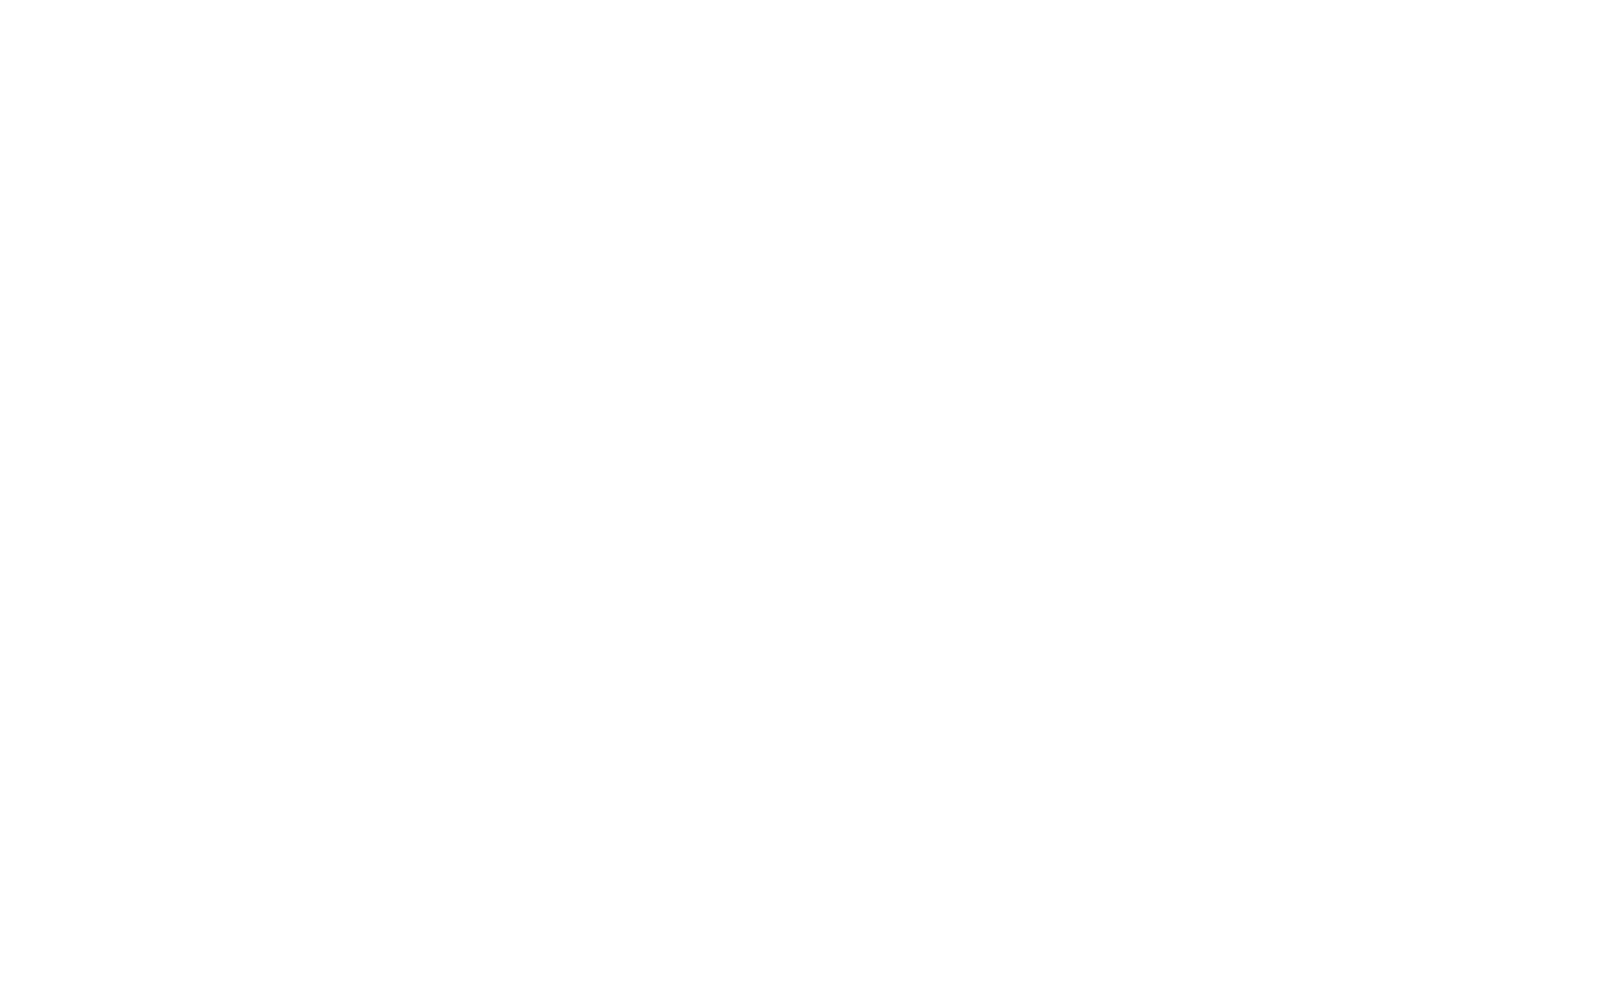

 Gamma Doradus Data saved! 


In [13]:
s.save(".",store_obj=True) #store_obj Stores the Smurfs object, and can be reloaded later

Now that we stored the data, we can also reload it

In [14]:
s_loaded = Smurfs.from_path("Gamma_Doradus")

In [15]:
s_loaded.result

,f_obj,frequency,amp,phase,snr,res_noise,significant
f_nr,,,,,,,
0,<smurfs._smurfs.frequency_finder.Frequency obj...,1.36376+/-0.00005,0.01033+/-0.00008,0.4027+/-0.0012,14.618957,-0.000888,True
1,<smurfs._smurfs.frequency_finder.Frequency obj...,1.32096+/-0.00005,0.01025+/-0.00008,0.3599+/-0.0012,17.613023,-0.000841,True
2,<smurfs._smurfs.frequency_finder.Frequency obj...,1.47077+/-0.00019,0.00281+/-0.00008,0.387+/-0.004,7.652337,-0.000854,True
3,<smurfs._smurfs.frequency_finder.Frequency obj...,1.87814+/-0.00022,0.00240+/-0.00008,0.530+/-0.005,6.719928,-0.000853,True
4,<smurfs._smurfs.frequency_finder.Frequency obj...,1.38531+/-0.00024,0.00223+/-0.00008,0.136+/-0.005,7.353009,-0.000863,True
5,<smurfs._smurfs.frequency_finder.Frequency obj...,0.31699+/-0.00026,0.00203+/-0.00008,0.088+/-0.006,5.647401,-0.000865,True
6,<smurfs._smurfs.frequency_finder.Frequency obj...,1.41723+/-0.00030,0.00180+/-0.00008,0.588+/-0.007,6.540241,-0.000859,True
7,<smurfs._smurfs.frequency_finder.Frequency obj...,2.74252+/-0.00030,0.00178+/-0.00008,0.944+/-0.007,9.562180,-0.000859,True
8,<smurfs._smurfs.frequency_finder.Frequency obj...,0.11236+/-0.00033,0.00163+/-0.00008,0.744+/-0.007,5.280380,-0.000856,True
